**앞 내용 생략(1~3)**
- 실습 부분만 진행

# 4. 자동 미분과 선형 회귀 실습


In [1]:
import tensorflow as tf

tape_gradient()는 자동 미분 기능을 수행합니다. 임의로 $2w^2+5$라는 식을 세워보고 $w$에 대해 미분해보겠습니다.

In [2]:
w = tf.Variable(2.)

def f(w):
  y = w**2
  z = 2*y + 5
  return z

In [7]:
with tf.GradientTape() as tape:
  z = f(w)

gradients = tape.gradient(z, [w])
print(gradients)

[<tf.Tensor: shape=(), dtype=float32, numpy=8.0>]


## 4.2 자동 미분을 이용한 선형 회귀 구현
우선 가중치 변수 W와 b를 선언합니다. 학습될 값이므로 임의의 값인 4와 1로 초기화하였습니다.

In [8]:
# 학습될 가중치 변수를 선언
W = tf.Variable(4.0)
b = tf.Variable(1.0)

가설을 함수로서 정의합니다.

In [20]:
# @tf.function
# 1. @tf.fucntion annotation을 붙이면 tf1.x 스타일로 해당 함수내의 로직이 동작한다.
# 2. 따라서 상황에 따라 속도가 약간 빨라질 수 있다.
# 3. 다만 해당 annotation을 붙이면 값을 바로 계산해볼수 없어서 모든 로직에 대한 프로그래밍이 끝난 뒤에 붙이는 것이 좋다.
def hypothesis(x):
  return W*x + b

현재의 가설에서 W와 b는 각각 4와 1이므로 임의의 입력값을 넣었을 때의 결과는 다음과 같습니다.



In [22]:
x_test = [3.5, 5, 5.5, 6]
print(hypothesis(x_test).numpy())

[15. 21. 23. 25.]


다음과 같이 평균 제곱 오차를 손실 함수로서 정의합니다.

In [23]:
# @tf.function
def mse_loss(y_pred, y):
  # 두 개의 차이값을 제곱을 해서 평균을 취한다.
  return tf.reduce_mean(tf.square(y_pred - y))

여기서 사용할 데이터는 X와 y가 약 10배의 차이를 가지는 데이터입니다.



In [24]:
X=[1,2,3,4,5,6,7,8,9] # 공부하는 시간
y=[11,22,33,44,53,66,77,87,95] # 각 공부하는 시간에 맵핑되는 성적

옵티마이저는 경사 하강법을 사용하되, 학습률(learning rate)는 0.01을 사용합니다.



In [25]:
optimizer = tf.optimizers.SGD(0.01)


In [26]:
for i in range(301):
  with tf.GradientTape() as tape:
    # 현재 파라미터에 기반한 입력 x에 대한 예측값을 y_pred
    y_pred = hypothesis(X)

    # 평균 제곱 오차를 계산
    cost = mse_loss(y_pred, y)

  # 손실 함수에 대한 파라미터의 미분값 계산
  gradients = tape.gradient(cost, [W, b])

  # 파라미터 업데이트
  optimizer.apply_gradients(zip(gradients, [W, b]))

  if i % 10 == 0:
    print("epoch : {:3} | W의 값 : {:5.4f} | b의 값 : {:5.4} | cost : {:5.6f}".format(i, W.numpy(), b.numpy(), cost))

epoch :   0 | W의 값 : 8.2133 | b의 값 : 1.664 | cost : 1402.555542
epoch :  10 | W의 값 : 10.4971 | b의 값 : 1.977 | cost : 1.351182
epoch :  20 | W의 값 : 10.5047 | b의 값 :  1.93 | cost : 1.328165
epoch :  30 | W의 값 : 10.5119 | b의 값 : 1.884 | cost : 1.306967
epoch :  40 | W의 값 : 10.5188 | b의 값 : 1.841 | cost : 1.287436
epoch :  50 | W의 값 : 10.5254 | b의 값 : 1.799 | cost : 1.269459
epoch :  60 | W의 값 : 10.5318 | b의 값 : 1.759 | cost : 1.252898
epoch :  70 | W의 값 : 10.5379 | b의 값 : 1.721 | cost : 1.237644
epoch :  80 | W의 값 : 10.5438 | b의 값 : 1.684 | cost : 1.223598
epoch :  90 | W의 값 : 10.5494 | b의 값 : 1.648 | cost : 1.210658
epoch : 100 | W의 값 : 10.5548 | b의 값 : 1.614 | cost : 1.198740
epoch : 110 | W의 값 : 10.5600 | b의 값 : 1.582 | cost : 1.187767
epoch : 120 | W의 값 : 10.5650 | b의 값 :  1.55 | cost : 1.177665
epoch : 130 | W의 값 : 10.5697 | b의 값 :  1.52 | cost : 1.168354
epoch : 140 | W의 값 : 10.5743 | b의 값 : 1.492 | cost : 1.159782
epoch : 150 | W의 값 : 10.5787 | b의 값 : 1.464 | cost : 1.151890
epoch 

W와 b값이 계속 업데이트 됨에 따라서 cost가 지속적으로 줄어드는 것을 확인할 수 있습니다. 학습된 W와 b의 값에 대해서 임의 입력을 넣었을 경우의 예측값을 확인해봅시다.



In [27]:
x_test = [3.5, 5, 5.5, 6]
print(hypothesis(x_test).numpy())

[38.35479  54.295143 59.608593 64.92204 ]


모델을 구현하는 방법은 한 가지가 아닙니다. 텐서플로우의 경우, 케라스라는 고수준의 API를 사용하면 모델을 이보다 좀 더 쉽게 구현할 수 있습니다. 이번에는 선형 회귀 모델을 케라스로 구현해봅시다.

## 4.3 케라스로 구현하는 선형 회귀
케라스에 대해서는 뒤의 딥 러닝 챕터에서 더 자세히 배우겠지만, 우선 간단하게 케라스를 이용해서 선형 회귀를 구현해봅시다. 케라스로 모델을 만드는 기본적인 형식은 다음과 같습니다. Sequential로 model이라는 이름의 모델을 만들고, 그리고 add를 통해 입력과 출력 벡터의 차원과 같은 필요한 정보들을 추가해갑니다.

**예시 코드. 실행 불가.**  
model = keras.models.Sequential()  
model.add(keras.layers.Dense(1, input_dim=1))

첫번째 인자인 1은 출력의 차원을 정의하며, 두번째 인자인 input_dim은 입력의 차원을 정의하는데 이번 실습과 같이 1개의 실수 $x$를 가지고 하는 1개의 실수 $y$를 예측하는 단순 선형 회귀를 구현하는 경우에는 각각 1의 값을 가집니다. 실습을 진행해봅시다.

In [29]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

In [30]:
X=[1,2,3,4,5,6,7,8,9] # 공부하는 시간
y=[11,22,33,44,53,66,77,87,95] # 각 공부하는 시간에 맵핑되는 성적

model = Sequential()

# 입력 x의 차원은 1, 출력 y의 차원도 1. 선형 회귀이므로 activation은 'linear'
model.add(Dense(1, input_dim=1, activation='linear'))

# sgd는 경사 하강법을 의미. 학습률(learning rate, lr)은 0.01.
sgd = optimizers.SGD(lr=0.01)

# 손실 함수(Loss function)은 평균제곱오차 mse를 사용합니다.
model.compile(optimizer=sgd ,loss='mse',metrics=['mse'])

# 주어진 X와 y데이터에 대해서 오차를 최소화하는 작업을 300번 시도합니다.
model.fit(X,y, batch_size=1, epochs=300, shuffle=False)

Epoch 1/300
9/9 [==============================] - 0s 997us/step - loss: 549.7354 - mse: 549.7354
Epoch 2/300
9/9 [==============================] - 0s 997us/step - loss: 2.4852 - mse: 2.4852
Epoch 3/300
9/9 [==============================] - 0s 874us/step - loss: 2.4542 - mse: 2.4542
Epoch 4/300
9/9 [==============================] - 0s 873us/step - loss: 2.4245 - mse: 2.4245
Epoch 5/300
9/9 [==============================] - 0s 873us/step - loss: 2.3962 - mse: 2.3962
Epoch 6/300
9/9 [==============================] - 0s 997us/step - loss: 2.3690 - mse: 2.3690
Epoch 7/300
9/9 [==============================] - 0s 868us/step - loss: 2.3431 - mse: 2.3431
Epoch 8/300
9/9 [==============================] - 0s 1ms/step - loss: 2.3182 - mse: 2.3182
Epoch 9/300
9/9 [==============================] - 0s 997us/step - loss: 2.2944 - mse: 2.2944
Epoch 10/300
9/9 [==============================] - 0s 623us/step - loss: 2.2716 - mse: 2.2716
Epoch 11/300
9/9 [==============================] - 0s 99

9/9 [==============================] - 0s 997us/step - loss: 1.7356 - mse: 1.7356
Epoch 88/300
9/9 [==============================] - 0s 997us/step - loss: 1.7344 - mse: 1.7344
Epoch 89/300
9/9 [==============================] - 0s 997us/step - loss: 1.7332 - mse: 1.7332
Epoch 90/300
9/9 [==============================] - 0s 997us/step - loss: 1.7321 - mse: 1.7321
Epoch 91/300
9/9 [==============================] - 0s 997us/step - loss: 1.7309 - mse: 1.7309
Epoch 92/300
9/9 [==============================] - 0s 873us/step - loss: 1.7299 - mse: 1.7299
Epoch 93/300
9/9 [==============================] - 0s 873us/step - loss: 1.7288 - mse: 1.7288
Epoch 94/300
9/9 [==============================] - 0s 998us/step - loss: 1.7278 - mse: 1.7278
Epoch 95/300
9/9 [==============================] - 0s 998us/step - loss: 1.7269 - mse: 1.7269
Epoch 96/300
9/9 [==============================] - 0s 873us/step - loss: 1.7259 - mse: 1.7259
Epoch 97/300
9/9 [==============================] - 0s 1ms/step

Epoch 173/300
9/9 [==============================] - 0s 997us/step - loss: 1.7008 - mse: 1.7008
Epoch 174/300
9/9 [==============================] - 0s 877us/step - loss: 1.7007 - mse: 1.7007
Epoch 175/300
9/9 [==============================] - 0s 873us/step - loss: 1.7007 - mse: 1.7007
Epoch 176/300
9/9 [==============================] - 0s 997us/step - loss: 1.7006 - mse: 1.7006
Epoch 177/300
9/9 [==============================] - 0s 1ms/step - loss: 1.7005 - mse: 1.7005
Epoch 178/300
9/9 [==============================] - 0s 872us/step - loss: 1.7005 - mse: 1.7005
Epoch 179/300
9/9 [==============================] - 0s 1ms/step - loss: 1.7004 - mse: 1.7004
Epoch 180/300
9/9 [==============================] - 0s 1ms/step - loss: 1.7004 - mse: 1.7004
Epoch 181/300
9/9 [==============================] - 0s 997us/step - loss: 1.7003 - mse: 1.7003
Epoch 182/300
9/9 [==============================] - 0s 873us/step - loss: 1.7003 - mse: 1.7003
Epoch 183/300
9/9 [===========================

9/9 [==============================] - 0s 997us/step - loss: 1.6989 - mse: 1.6989
Epoch 259/300
9/9 [==============================] - 0s 877us/step - loss: 1.6989 - mse: 1.6989
Epoch 260/300
9/9 [==============================] - 0s 902us/step - loss: 1.6989 - mse: 1.6989
Epoch 261/300
9/9 [==============================] - 0s 873us/step - loss: 1.6989 - mse: 1.6989
Epoch 262/300
9/9 [==============================] - 0s 877us/step - loss: 1.6988 - mse: 1.6988
Epoch 263/300
9/9 [==============================] - 0s 873us/step - loss: 1.6988 - mse: 1.6988
Epoch 264/300
9/9 [==============================] - 0s 1ms/step - loss: 1.6988 - mse: 1.6988
Epoch 265/300
9/9 [==============================] - 0s 873us/step - loss: 1.6988 - mse: 1.6988
Epoch 266/300
9/9 [==============================] - 0s 873us/step - loss: 1.6988 - mse: 1.6988
Epoch 267/300
9/9 [==============================] - 0s 997us/step - loss: 1.6988 - mse: 1.6988
Epoch 268/300
9/9 [==============================] - 0s 

위의 코드는 간단하지만, 지금까지 배운 것들이 집대성 된 코드입니다. 우선 공부한 시간을 $x$, 각 공부한 시간에 따른 성적을 $y$라고 해봅시다.   
activation은 어떤 함수를 사용할 것인지를 의미하는데 선형 회귀를 사용할 경우에는 linear라고 기재합니다.

옵티마이저로 경사 하강법을 사용하고 싶다면, sgd라고 기재합니다. 학습률은 0.01로 정하였습니다. 손실 함수로는 평균 제곱 오차를 사용합니다. 그리고 전체 데이터에 대한 훈련 횟수는 300으로 합니다.

이제 최종적으로 선택된 오차를 최소화하는 직선을 그래프로 그려보겠습니다.



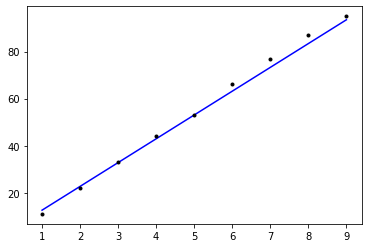

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(X, model.predict(X), 'b', X,y, 'k.');

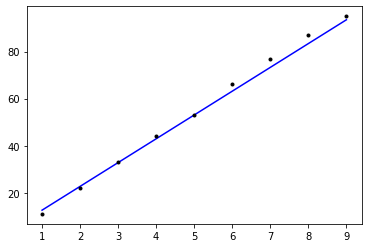

In [35]:
# %matplotlib inline
import matplotlib.pyplot as plt
plt.plot(X, model.predict(X), 'b', X,y, 'k.');

위의 그래프에서 각 점은 우리가 실제 주었던 실제값에 해당되며, 직선은 실제값으로부터 오차를 최소화하는 와 의 값을 가지는 직선입니다. 이제 이 직선을 통해 9시간 30분을 공부하였을 때의 시험 성적을 예측하게 해봅시다. model.predict()은 학습이 완료된 모델이 입력된 데이터에 대해서 어떤 값을 예측하는지를 보여줍니다.

In [38]:
print(model.predict([9.5]))
print("x(공부시간)이 9.5시간이면 약 98.56점을 얻을 것으로 예측한다.")

[[98.55645]]
x(공부시간)이 9.5시간이면 약 98.56점을 얻을 것으로 예측한다.


# 5. 로지스틱 회귀 실습

## 5.1 케라스로 구현하는 로지스틱 회귀

In [39]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

In [40]:
X = np.array([-50, -40, -30, -20, -10, -5, 0, 5, 10, 20, 30, 40, 50])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]) #숫자 10부터 1

model = Sequential()
model.add(Dense(1, input_dim=1, activation='sigmoid'))

# 옵티마이저는 경사하강법 sgd를 사용합니다.
# 손실 함수(Loss function)는 binary_crossentropy(이진 크로스 엔트로피)를 사용합니다.
sgd = optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd ,loss='binary_crossentropy', metrics=['binary_accuracy'])

# 주어진 X와 y데이터에 대해서 오차를 최소화하는 작업을 200번 시도합니다.
model.fit(X,y, batch_size=1, epochs=200, shuffle=False)

Epoch 1/200
13/13 [==============================] - 0s 831us/step - loss: 0.1694 - binary_accuracy: 0.9526
Epoch 2/200
13/13 [==============================] - 0s 831us/step - loss: 0.1486 - binary_accuracy: 0.9526
Epoch 3/200
13/13 [==============================] - 0s 831us/step - loss: 0.1438 - binary_accuracy: 0.9526
Epoch 4/200
13/13 [==============================] - 0s 2ms/step - loss: 0.1412 - binary_accuracy: 0.9526
Epoch 5/200
13/13 [==============================] - 0s 1ms/step - loss: 0.1393 - binary_accuracy: 0.9526
Epoch 6/200
13/13 [==============================] - 0s 997us/step - loss: 0.1377 - binary_accuracy: 0.9526
Epoch 7/200
13/13 [==============================] - 0s 831us/step - loss: 0.1363 - binary_accuracy: 0.9526
Epoch 8/200
13/13 [==============================] - 0s 834us/step - loss: 0.1350 - binary_accuracy: 0.9526
Epoch 9/200
13/13 [==============================] - 0s 917us/step - loss: 0.1338 - binary_accuracy: 0.9526
Epoch 10/200
13/13 [============

13/13 [==============================] - 0s 1ms/step - loss: 0.0850 - binary_accuracy: 0.9526
Epoch 77/200
13/13 [==============================] - 0s 1ms/step - loss: 0.0846 - binary_accuracy: 0.9526
Epoch 78/200
13/13 [==============================] - 0s 997us/step - loss: 0.0842 - binary_accuracy: 0.9526
Epoch 79/200
13/13 [==============================] - 0s 997us/step - loss: 0.0838 - binary_accuracy: 0.9526
Epoch 80/200
13/13 [==============================] - 0s 1ms/step - loss: 0.0833 - binary_accuracy: 0.9526
Epoch 81/200
13/13 [==============================] - 0s 1ms/step - loss: 0.0829 - binary_accuracy: 0.9526
Epoch 82/200
13/13 [==============================] - 0s 1ms/step - loss: 0.0825 - binary_accuracy: 0.9526
Epoch 83/200
13/13 [==============================] - 0s 914us/step - loss: 0.0821 - binary_accuracy: 0.9526
Epoch 84/200
13/13 [==============================] - 0s 1ms/step - loss: 0.0817 - binary_accuracy: 0.9526
Epoch 85/200
13/13 [========================

13/13 [==============================] - 0s 748us/step - loss: 0.0632 - binary_accuracy: 0.9526
Epoch 152/200
13/13 [==============================] - 0s 914us/step - loss: 0.0630 - binary_accuracy: 0.9526
Epoch 153/200
13/13 [==============================] - 0s 748us/step - loss: 0.0628 - binary_accuracy: 0.9526
Epoch 154/200
13/13 [==============================] - 0s 914us/step - loss: 0.0626 - binary_accuracy: 0.9526
Epoch 155/200
13/13 [==============================] - 0s 914us/step - loss: 0.0624 - binary_accuracy: 0.9526
Epoch 156/200
13/13 [==============================] - 0s 997us/step - loss: 0.0622 - binary_accuracy: 0.9526
Epoch 157/200
13/13 [==============================] - 0s 997us/step - loss: 0.0620 - binary_accuracy: 0.9526
Epoch 158/200
13/13 [==============================] - 0s 997us/step - loss: 0.0618 - binary_accuracy: 0.9526
Epoch 159/200
13/13 [==============================] - 0s 748us/step - loss: 0.0617 - binary_accuracy: 0.9526
Epoch 160/200
13/13 [===

임의의 숫자들의 나열을 $X$라고 하였을 때, 숫자 10 이상인 경우에는 1, 미만인 경우에는 0을 부여한 레이블 데이터를 $y$라고 해봅시다. 이번 데이터는 앞서 배운 단순 선형 회귀때와 마찬가지로 1개의 실수인 로부터 1개의 실수인 $y$를 예측하는 맵핑 관계를 가지므로 각각 1을 기재합니다. 또한 시그모이드 함수를 사용할 것이므로 activation에 sigmoid를 기재해줍니다.

옵티마이저로는 경사 하강법의 일종인 확률적 경사 하강법을 사용하였으며, 손실 함수로는 크로스 엔트로피 함수를 사용합니다. 이진 분류 문제에 크로스 엔트로피 함수를 사용할 경우에는 binary_crossentropy를 기재해주면 됩니다. 전체 데이터에 대한 훈련 횟수는 200으로 합니다.

총 200회에 걸쳐 전체 데이터에 대한 오차를 최소화하는 $W$와 $b$를 찾아내는 작업을 합니다. 약 190회부터 정확도가 100%가 나오기 시작했습니다. 실제값과 오차를 최소화하는 $W$와 $b$의 값을 가진 시그모이드 함수 그래프를 그려보겠습니다.

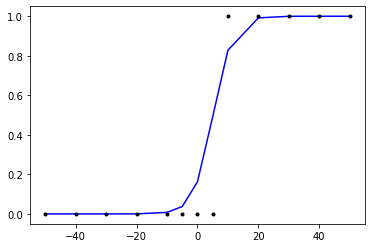

In [46]:
plt.plot(X, model.predict(X), 'b', X,y, 'k.');

$X$값이 5와 10사이의 어떤 값일때 $y$값이 0.5가 넘기 시작하는 것처럼 보입니다. 정확도가 100%가 나왔었기 때문에 적어도 $X$값이 5일때는 $y$ 값이 0.5보다 작고, $X$값이 10일 때는 $y$값이 0.5를 넘을 것입니다. 이제 $X$값이 5보다 작은 값일 때와 $X$값이 10보다 클 때에 대해서 $y$값을 출력해봅시다.

In [47]:
print(model.predict([1, 2, 3, 4, 4.5]))
print(model.predict([11, 21, 31, 41, 500]))

[[0.21105978]
 [0.26945183]
 [0.33709607]
 [0.41214165]
 [0.45151603]]
[[0.8690841]
 [0.9939661]
 [0.9997554]
 [0.9999902]
 [1.       ]]


$X$값이 5보다 작을 때는 0.5보다 작은 값을, $X$값이 10보다 클 때는 0.5보다 큰 값을 출력하는 것을 볼 수 있습니다.

# 7. 다중 입력에 대한 실습

이번에는 독립 변수 $x$가 2개 이상인 선형 회귀와 로지스틱 회귀에 대해서 배워보도록 하겠습니다. 비용 함수와 옵티마이저 등을 사용하는 원리는 동일합니다.

## 7.1 다중 선형 회귀

딥 러닝 챕터로 들어가게되면 대부분의 입력들은 독립 변수가 2개 이상입니다. 이는 모델을 직접 코딩하는 관점에서는 입력 벡터의 차원이 2이상이라고 할 수 있습니다. $y$를 결정하는데 있어 독립 변수가 3개인 선형 회귀를 풀어봅시다. 중간 고사, 기말 고사, 그리고 추가 점수를 어떤 공식을 통해 최종 점수를 계산한 데이터가 있습니다.

Midterm()	Final()	Added point()	Score($1000)(y)  
70	85	11	73  
71	89	18	82  
50	80	20	72  
99	20	10	57  
50	10	10	34  
20	99	10	58  
40	50	20	56  

이 경우 가설은 다음과 같습니다.


$$ H(X) = {W_1x_1 + W_2x_2 + W_3x_3 + b} $$

위의 데이터 중 상위 5개의 데이터만 훈련에 사용하고, 나머지 2개는 테스트에 사용해보겠습니다.



In [48]:
import numpy as np
from tensorflow.keras.models import Sequential # 케라스의 Sequential()을 임포트
from tensorflow.keras.layers import Dense # 케라스의 Dense()를 임포트
from tensorflow.keras import optimizers # 케라스의 옵티마이저를 임포트

# 입력 벡터의 차원은 3입니다. 즉, input_dim은 3입니다.
X = np.array([[70,85,11],[71,89,18],[50,80,20],[99,20,10],[50,10,10]]) # 중간, 기말, 가산점

# 출력 벡터의 차원은 1입니다. 즉, output_dim은 1입니다.
y = np.array([73,82,72,57,34]) # 최종 성적

model=Sequential()
model.add(Dense(1, input_dim=3, activation='linear'))

# 학습률(learning rate, lr)은 0.00001로 합니다.
sgd=optimizers.SGD(lr=0.00001)

# 손실 함수(Loss function)은 평균제곱오차 mse를 사용합니다.
model.compile(optimizer = sgd ,loss='mse',metrics=['mse'])

# 주어진 X와 y데이터에 대해서 오차를 최소화하는 작업을 2,000번 시도합니다.
model.fit(X,y, batch_size=1, epochs=2000, shuffle=False)

Epoch 1/2000
5/5 [==============================] - 0s 1ms/step - loss: 436.7265 - mse: 436.7265
Epoch 2/2000
5/5 [==============================] - 0s 995us/step - loss: 124.6314 - mse: 124.6314
Epoch 3/2000
5/5 [==============================] - 0s 1ms/step - loss: 66.4410 - mse: 66.4410
Epoch 4/2000
5/5 [==============================] - 0s 1ms/step - loss: 50.4174 - mse: 50.4174
Epoch 5/2000
5/5 [==============================] - 0s 1ms/step - loss: 42.8996 - mse: 42.8996
Epoch 6/2000
5/5 [==============================] - 0s 1ms/step - loss: 37.9015 - mse: 37.9015
Epoch 7/2000
5/5 [==============================] - 0s 997us/step - loss: 34.1186 - mse: 34.1186
Epoch 8/2000
5/5 [==============================] - 0s 997us/step - loss: 31.1484 - mse: 31.1484
Epoch 9/2000
5/5 [==============================] - 0s 997us/step - loss: 28.7977 - mse: 28.7977
Epoch 10/2000
5/5 [==============================] - 0s 998us/step - loss: 26.9390 - mse: 26.9390
Epoch 11/2000
5/5 [================

5/5 [==============================] - 0s 1ms/step - loss: 17.3944 - mse: 17.3944
Epoch 86/2000
5/5 [==============================] - 0s 1ms/step - loss: 17.3303 - mse: 17.3303
Epoch 87/2000
5/5 [==============================] - 0s 1ms/step - loss: 17.2664 - mse: 17.2664
Epoch 88/2000
5/5 [==============================] - 0s 1ms/step - loss: 17.2028 - mse: 17.2028
Epoch 89/2000
5/5 [==============================] - 0s 1ms/step - loss: 17.1393 - mse: 17.1393
Epoch 90/2000
5/5 [==============================] - 0s 1ms/step - loss: 17.0761 - mse: 17.0761
Epoch 91/2000
5/5 [==============================] - 0s 1ms/step - loss: 17.0130 - mse: 17.0130
Epoch 92/2000
5/5 [==============================] - 0s 1ms/step - loss: 16.9502 - mse: 16.9502
Epoch 93/2000
5/5 [==============================] - 0s 1ms/step - loss: 16.8876 - mse: 16.8876
Epoch 94/2000
5/5 [==============================] - 0s 1ms/step - loss: 16.8252 - mse: 16.8252
Epoch 95/2000
5/5 [==============================] - 0

5/5 [==============================] - 0s 1ms/step - loss: 12.7365 - mse: 12.7365
Epoch 170/2000
5/5 [==============================] - 0s 1ms/step - loss: 12.6892 - mse: 12.6892
Epoch 171/2000
5/5 [==============================] - 0s 1ms/step - loss: 12.6421 - mse: 12.6421
Epoch 172/2000
5/5 [==============================] - 0s 1ms/step - loss: 12.5952 - mse: 12.5952
Epoch 173/2000
5/5 [==============================] - 0s 997us/step - loss: 12.5485 - mse: 12.5485
Epoch 174/2000
5/5 [==============================] - 0s 1ms/step - loss: 12.5019 - mse: 12.5019
Epoch 175/2000
5/5 [==============================] - 0s 997us/step - loss: 12.4556 - mse: 12.4556
Epoch 176/2000
5/5 [==============================] - 0s 1ms/step - loss: 12.4094 - mse: 12.4094
Epoch 177/2000
5/5 [==============================] - 0s 1ms/step - loss: 12.3633 - mse: 12.3633
Epoch 178/2000
5/5 [==============================] - 0s 1ms/step - loss: 12.3174 - mse: 12.3174
Epoch 179/2000
5/5 [=====================

5/5 [==============================] - 0s 1ms/step - loss: 9.3182 - mse: 9.3182
Epoch 254/2000
5/5 [==============================] - 0s 1ms/step - loss: 9.2836 - mse: 9.2836
Epoch 255/2000
5/5 [==============================] - 0s 1ms/step - loss: 9.2491 - mse: 9.2491
Epoch 256/2000
5/5 [==============================] - 0s 998us/step - loss: 9.2147 - mse: 9.2147
Epoch 257/2000
5/5 [==============================] - 0s 997us/step - loss: 9.1804 - mse: 9.1804
Epoch 258/2000
5/5 [==============================] - 0s 1ms/step - loss: 9.1463 - mse: 9.1463
Epoch 259/2000
5/5 [==============================] - 0s 998us/step - loss: 9.1123 - mse: 9.1123
Epoch 260/2000
5/5 [==============================] - 0s 1ms/step - loss: 9.0784 - mse: 9.0784
Epoch 261/2000
5/5 [==============================] - 0s 997us/step - loss: 9.0447 - mse: 9.0447
Epoch 262/2000
5/5 [==============================] - 0s 1ms/step - loss: 9.0110 - mse: 9.0110
Epoch 263/2000
5/5 [==============================] - 0s 

5/5 [==============================] - 0s 995us/step - loss: 6.7872 - mse: 6.7872
Epoch 339/2000
5/5 [==============================] - 0s 997us/step - loss: 6.7619 - mse: 6.7619
Epoch 340/2000
5/5 [==============================] - 0s 997us/step - loss: 6.7367 - mse: 6.7367
Epoch 341/2000
5/5 [==============================] - 0s 996us/step - loss: 6.7116 - mse: 6.7116
Epoch 342/2000
5/5 [==============================] - 0s 1ms/step - loss: 6.6866 - mse: 6.6866
Epoch 343/2000
5/5 [==============================] - 0s 997us/step - loss: 6.6616 - mse: 6.6616
Epoch 344/2000
5/5 [==============================] - 0s 1ms/step - loss: 6.6368 - mse: 6.6368
Epoch 345/2000
5/5 [==============================] - 0s 998us/step - loss: 6.6121 - mse: 6.6121
Epoch 346/2000
5/5 [==============================] - 0s 1ms/step - loss: 6.5874 - mse: 6.5874
Epoch 347/2000
5/5 [==============================] - 0s 1ms/step - loss: 6.5628 - mse: 6.5628
Epoch 348/2000
5/5 [==============================] -

5/5 [==============================] - 0s 1ms/step - loss: 4.9395 - mse: 4.9395
Epoch 424/2000
5/5 [==============================] - 0s 1ms/step - loss: 4.9210 - mse: 4.9210
Epoch 425/2000
5/5 [==============================] - 0s 1ms/step - loss: 4.9026 - mse: 4.9026
Epoch 426/2000
5/5 [==============================] - 0s 1ms/step - loss: 4.8843 - mse: 4.8843
Epoch 427/2000
5/5 [==============================] - 0s 999us/step - loss: 4.8661 - mse: 4.8661
Epoch 428/2000
5/5 [==============================] - 0s 1ms/step - loss: 4.8479 - mse: 4.8479
Epoch 429/2000
5/5 [==============================] - 0s 1ms/step - loss: 4.8298 - mse: 4.8298
Epoch 430/2000
5/5 [==============================] - 0s 1ms/step - loss: 4.8117 - mse: 4.8117
Epoch 431/2000
5/5 [==============================] - 0s 997us/step - loss: 4.7937 - mse: 4.7937
Epoch 432/2000
5/5 [==============================] - 0s 1ms/step - loss: 4.7758 - mse: 4.7758
Epoch 433/2000
5/5 [==============================] - 0s 1ms/

5/5 [==============================] - 0s 1ms/step - loss: 3.5913 - mse: 3.5913
Epoch 509/2000
5/5 [==============================] - 0s 1ms/step - loss: 3.5779 - mse: 3.5779
Epoch 510/2000
5/5 [==============================] - 0s 997us/step - loss: 3.5645 - mse: 3.5645
Epoch 511/2000
5/5 [==============================] - 0s 1ms/step - loss: 3.5511 - mse: 3.5511
Epoch 512/2000
5/5 [==============================] - 0s 998us/step - loss: 3.5378 - mse: 3.5378
Epoch 513/2000
5/5 [==============================] - 0s 1ms/step - loss: 3.5245 - mse: 3.5245
Epoch 514/2000
5/5 [==============================] - 0s 1ms/step - loss: 3.5113 - mse: 3.5113
Epoch 515/2000
5/5 [==============================] - 0s 997us/step - loss: 3.4981 - mse: 3.4981
Epoch 516/2000
5/5 [==============================] - 0s 1ms/step - loss: 3.4850 - mse: 3.4850
Epoch 517/2000
5/5 [==============================] - 0s 997us/step - loss: 3.4719 - mse: 3.4719
Epoch 518/2000
5/5 [==============================] - 0s 

5/5 [==============================] - 0s 997us/step - loss: 2.6083 - mse: 2.6083
Epoch 594/2000
5/5 [==============================] - 0s 1ms/step - loss: 2.5985 - mse: 2.5985
Epoch 595/2000
5/5 [==============================] - 0s 1ms/step - loss: 2.5887 - mse: 2.5887
Epoch 596/2000
5/5 [==============================] - 0s 997us/step - loss: 2.5789 - mse: 2.5789
Epoch 597/2000
5/5 [==============================] - 0s 2ms/step - loss: 2.5693 - mse: 2.5693
Epoch 598/2000
5/5 [==============================] - 0s 1ms/step - loss: 2.5596 - mse: 2.5596
Epoch 599/2000
5/5 [==============================] - 0s 2ms/step - loss: 2.5499 - mse: 2.5499
Epoch 600/2000
5/5 [==============================] - 0s 1ms/step - loss: 2.5403 - mse: 2.5403
Epoch 601/2000
5/5 [==============================] - 0s 1ms/step - loss: 2.5308 - mse: 2.5308
Epoch 602/2000
5/5 [==============================] - 0s 2ms/step - loss: 2.5213 - mse: 2.5213
Epoch 603/2000
5/5 [==============================] - 0s 1ms/

5/5 [==============================] - 0s 1ms/step - loss: 1.8848 - mse: 1.8848
Epoch 680/2000
5/5 [==============================] - 0s 1ms/step - loss: 1.8777 - mse: 1.8777
Epoch 681/2000
5/5 [==============================] - 0s 1ms/step - loss: 1.8706 - mse: 1.8706
Epoch 682/2000
5/5 [==============================] - 0s 997us/step - loss: 1.8635 - mse: 1.8635
Epoch 683/2000
5/5 [==============================] - 0s 1ms/step - loss: 1.8564 - mse: 1.8564
Epoch 684/2000
5/5 [==============================] - 0s 998us/step - loss: 1.8494 - mse: 1.8494
Epoch 685/2000
5/5 [==============================] - 0s 998us/step - loss: 1.8424 - mse: 1.8424
Epoch 686/2000
5/5 [==============================] - 0s 1ms/step - loss: 1.8355 - mse: 1.8355
Epoch 687/2000
5/5 [==============================] - 0s 998us/step - loss: 1.8285 - mse: 1.8285
Epoch 688/2000
5/5 [==============================] - 0s 997us/step - loss: 1.8216 - mse: 1.8216
Epoch 689/2000
5/5 [==============================] - 0

5/5 [==============================] - 0s 1ms/step - loss: 1.3652 - mse: 1.3652
Epoch 765/2000
5/5 [==============================] - 0s 1ms/step - loss: 1.3600 - mse: 1.3600
Epoch 766/2000
5/5 [==============================] - 0s 998us/step - loss: 1.3548 - mse: 1.3548
Epoch 767/2000
5/5 [==============================] - 0s 1ms/step - loss: 1.3497 - mse: 1.3497
Epoch 768/2000
5/5 [==============================] - 0s 997us/step - loss: 1.3446 - mse: 1.3446
Epoch 769/2000
5/5 [==============================] - 0s 1ms/step - loss: 1.3395 - mse: 1.3395
Epoch 770/2000
5/5 [==============================] - 0s 749us/step - loss: 1.3344 - mse: 1.3344
Epoch 771/2000
5/5 [==============================] - 0s 1ms/step - loss: 1.3293 - mse: 1.3293
Epoch 772/2000
5/5 [==============================] - 0s 997us/step - loss: 1.3243 - mse: 1.3243
Epoch 773/2000
5/5 [==============================] - 0s 1ms/step - loss: 1.3192 - mse: 1.3192
Epoch 774/2000
5/5 [==============================] - 0s 

5/5 [==============================] - 0s 998us/step - loss: 0.9872 - mse: 0.9872
Epoch 850/2000
5/5 [==============================] - 0s 997us/step - loss: 0.9835 - mse: 0.9835
Epoch 851/2000
5/5 [==============================] - 0s 997us/step - loss: 0.9797 - mse: 0.9797
Epoch 852/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.9760 - mse: 0.9760
Epoch 853/2000
5/5 [==============================] - 0s 997us/step - loss: 0.9722 - mse: 0.9722
Epoch 854/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.9685 - mse: 0.9685
Epoch 855/2000
5/5 [==============================] - 0s 997us/step - loss: 0.9648 - mse: 0.9648
Epoch 856/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.9611 - mse: 0.9611
Epoch 857/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.9575 - mse: 0.9575
Epoch 858/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.9538 - mse: 0.9538
Epoch 859/2000
5/5 [==============================] - 0

5/5 [==============================] - 0s 1ms/step - loss: 0.7126 - mse: 0.7126
Epoch 935/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.7099 - mse: 0.7099
Epoch 936/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.7072 - mse: 0.7072
Epoch 937/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.7045 - mse: 0.7045
Epoch 938/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.7018 - mse: 0.7018
Epoch 939/2000
5/5 [==============================] - 0s 997us/step - loss: 0.6991 - mse: 0.6991
Epoch 940/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.6964 - mse: 0.6964
Epoch 941/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.6937 - mse: 0.6937
Epoch 942/2000
5/5 [==============================] - 0s 998us/step - loss: 0.6910 - mse: 0.6910
Epoch 943/2000
5/5 [==============================] - 0s 973us/step - loss: 0.6884 - mse: 0.6884
Epoch 944/2000
5/5 [==============================] - 0s 2m

5/5 [==============================] - 0s 1ms/step - loss: 0.5134 - mse: 0.5134
Epoch 1020/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.5114 - mse: 0.5114
Epoch 1021/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.5095 - mse: 0.5095
Epoch 1022/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.5075 - mse: 0.5075
Epoch 1023/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.5055 - mse: 0.5055
Epoch 1024/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.5036 - mse: 0.5036
Epoch 1025/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.5016 - mse: 0.5016
Epoch 1026/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.4997 - mse: 0.4997
Epoch 1027/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.4978 - mse: 0.4978
Epoch 1028/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.4959 - mse: 0.4959
Epoch 1029/2000
5/5 [==============================] - 0

5/5 [==============================] - 0s 1ms/step - loss: 0.3691 - mse: 0.3691
Epoch 1105/2000
5/5 [==============================] - 0s 997us/step - loss: 0.3677 - mse: 0.3677
Epoch 1106/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.3663 - mse: 0.3663
Epoch 1107/2000
5/5 [==============================] - 0s 997us/step - loss: 0.3648 - mse: 0.3648
Epoch 1108/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.3634 - mse: 0.3634
Epoch 1109/2000
5/5 [==============================] - 0s 997us/step - loss: 0.3620 - mse: 0.3620
Epoch 1110/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.3606 - mse: 0.3606
Epoch 1111/2000
5/5 [==============================] - 0s 998us/step - loss: 0.3592 - mse: 0.3592
Epoch 1112/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.3578 - mse: 0.3578
Epoch 1113/2000
5/5 [==============================] - 0s 997us/step - loss: 0.3564 - mse: 0.3564
Epoch 1114/2000
5/5 [=========================

5/5 [==============================] - 0s 1ms/step - loss: 0.2648 - mse: 0.2648
Epoch 1190/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.2638 - mse: 0.2638
Epoch 1191/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.2628 - mse: 0.2628
Epoch 1192/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.2617 - mse: 0.2617
Epoch 1193/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.2607 - mse: 0.2607
Epoch 1194/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.2597 - mse: 0.2597
Epoch 1195/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.2587 - mse: 0.2587
Epoch 1196/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.2577 - mse: 0.2577
Epoch 1197/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.2566 - mse: 0.2566
Epoch 1198/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.2556 - mse: 0.2556
Epoch 1199/2000
5/5 [==============================] - 0

5/5 [==============================] - 0s 1ms/step - loss: 0.1896 - mse: 0.1896
Epoch 1275/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.1889 - mse: 0.1889
Epoch 1276/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.1881 - mse: 0.1881
Epoch 1277/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.1874 - mse: 0.1874
Epoch 1278/2000
5/5 [==============================] - 0s 997us/step - loss: 0.1866 - mse: 0.1866
Epoch 1279/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.1859 - mse: 0.1859
Epoch 1280/2000
5/5 [==============================] - 0s 997us/step - loss: 0.1852 - mse: 0.1852
Epoch 1281/2000
5/5 [==============================] - 0s 2ms/step - loss: 0.1844 - mse: 0.1844
Epoch 1282/2000
5/5 [==============================] - 0s 997us/step - loss: 0.1837 - mse: 0.1837
Epoch 1283/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.1830 - mse: 0.1830
Epoch 1284/2000
5/5 [=============================

5/5 [==============================] - 0s 1ms/step - loss: 0.1360 - mse: 0.1360
Epoch 1359/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.1355 - mse: 0.1355
Epoch 1360/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.1350 - mse: 0.1350
Epoch 1361/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.1344 - mse: 0.1344
Epoch 1362/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.1339 - mse: 0.1339
Epoch 1363/2000
5/5 [==============================] - 0s 997us/step - loss: 0.1334 - mse: 0.1334
Epoch 1364/2000
5/5 [==============================] - 0s 997us/step - loss: 0.1328 - mse: 0.1328
Epoch 1365/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.1323 - mse: 0.1323
Epoch 1366/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.1318 - mse: 0.1318
Epoch 1367/2000
5/5 [==============================] - 0s 997us/step - loss: 0.1313 - mse: 0.1313
Epoch 1368/2000
5/5 [=============================

5/5 [==============================] - 0s 1ms/step - loss: 0.0971 - mse: 0.0971
Epoch 1444/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0967 - mse: 0.0967
Epoch 1445/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0963 - mse: 0.0963
Epoch 1446/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0960 - mse: 0.0960
Epoch 1447/2000
5/5 [==============================] - 0s 998us/step - loss: 0.0956 - mse: 0.0956
Epoch 1448/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0952 - mse: 0.0952
Epoch 1449/2000
5/5 [==============================] - 0s 997us/step - loss: 0.0948 - mse: 0.0948
Epoch 1450/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0945 - mse: 0.0945
Epoch 1451/2000
5/5 [==============================] - 0s 997us/step - loss: 0.0941 - mse: 0.0941
Epoch 1452/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0937 - mse: 0.0937
Epoch 1453/2000
5/5 [=============================

5/5 [==============================] - 0s 1ms/step - loss: 0.0693 - mse: 0.0693
Epoch 1529/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0691 - mse: 0.0691
Epoch 1530/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0688 - mse: 0.0688
Epoch 1531/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0685 - mse: 0.0685
Epoch 1532/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0682 - mse: 0.0682
Epoch 1533/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0680 - mse: 0.0680
Epoch 1534/2000
5/5 [==============================] - 0s 997us/step - loss: 0.0677 - mse: 0.0677
Epoch 1535/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0674 - mse: 0.0674
Epoch 1536/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0672 - mse: 0.0672
Epoch 1537/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0669 - mse: 0.0669
Epoch 1538/2000
5/5 [==============================] -

5/5 [==============================] - 0s 998us/step - loss: 0.0496 - mse: 0.0496
Epoch 1614/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0494 - mse: 0.0494
Epoch 1615/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0492 - mse: 0.0492
Epoch 1616/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0490 - mse: 0.0490
Epoch 1617/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0488 - mse: 0.0488
Epoch 1618/2000
5/5 [==============================] - 0s 997us/step - loss: 0.0486 - mse: 0.0486
Epoch 1619/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0485 - mse: 0.0485
Epoch 1620/2000
5/5 [==============================] - 0s 997us/step - loss: 0.0483 - mse: 0.0483
Epoch 1621/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0481 - mse: 0.0481
Epoch 1622/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0479 - mse: 0.0479
Epoch 1623/2000
5/5 [=============================

5/5 [==============================] - 0s 1ms/step - loss: 0.0357 - mse: 0.0357
Epoch 1699/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0355 - mse: 0.0355
Epoch 1700/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0354 - mse: 0.0354
Epoch 1701/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0353 - mse: 0.0353
Epoch 1702/2000
5/5 [==============================] - 0s 997us/step - loss: 0.0351 - mse: 0.0351
Epoch 1703/2000
5/5 [==============================] - 0s 998us/step - loss: 0.0350 - mse: 0.0350
Epoch 1704/2000
5/5 [==============================] - 0s 997us/step - loss: 0.0349 - mse: 0.0349
Epoch 1705/2000
5/5 [==============================] - 0s 998us/step - loss: 0.0347 - mse: 0.0347
Epoch 1706/2000
5/5 [==============================] - 0s 997us/step - loss: 0.0346 - mse: 0.0346
Epoch 1707/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0345 - mse: 0.0345
Epoch 1708/2000
5/5 [=========================

5/5 [==============================] - 0s 1ms/step - loss: 0.0260 - mse: 0.0260
Epoch 1783/2000
5/5 [==============================] - 0s 997us/step - loss: 0.0259 - mse: 0.0259
Epoch 1784/2000
5/5 [==============================] - 0s 997us/step - loss: 0.0258 - mse: 0.0258
Epoch 1785/2000
5/5 [==============================] - 0s 997us/step - loss: 0.0257 - mse: 0.0257
Epoch 1786/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0257 - mse: 0.0257
Epoch 1787/2000
5/5 [==============================] - 0s 998us/step - loss: 0.0256 - mse: 0.0256
Epoch 1788/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0255 - mse: 0.0255
Epoch 1789/2000
5/5 [==============================] - 0s 998us/step - loss: 0.0254 - mse: 0.0254
Epoch 1790/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0253 - mse: 0.0253
Epoch 1791/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0252 - mse: 0.0252
Epoch 1792/2000
5/5 [=========================

5/5 [==============================] - 0s 1ms/step - loss: 0.0193 - mse: 0.0193
Epoch 1867/2000
5/5 [==============================] - 0s 998us/step - loss: 0.0193 - mse: 0.0193
Epoch 1868/2000
5/5 [==============================] - 0s 997us/step - loss: 0.0192 - mse: 0.0192
Epoch 1869/2000
5/5 [==============================] - 0s 997us/step - loss: 0.0191 - mse: 0.0191
Epoch 1870/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0191 - mse: 0.0191
Epoch 1871/2000
5/5 [==============================] - 0s 997us/step - loss: 0.0190 - mse: 0.0190
Epoch 1872/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0189 - mse: 0.0189
Epoch 1873/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0189 - mse: 0.0189
Epoch 1874/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0188 - mse: 0.0188
Epoch 1875/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0187 - mse: 0.0187
Epoch 1876/2000
5/5 [===========================

5/5 [==============================] - 0s 997us/step - loss: 0.0147 - mse: 0.0147
Epoch 1952/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0146 - mse: 0.0146
Epoch 1953/2000
5/5 [==============================] - 0s 997us/step - loss: 0.0146 - mse: 0.0146
Epoch 1954/2000
5/5 [==============================] - 0s 997us/step - loss: 0.0145 - mse: 0.0145
Epoch 1955/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0145 - mse: 0.0145
Epoch 1956/2000
5/5 [==============================] - 0s 998us/step - loss: 0.0144 - mse: 0.0144
Epoch 1957/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0144 - mse: 0.0144
Epoch 1958/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0144 - mse: 0.0144
Epoch 1959/2000
5/5 [==============================] - 0s 1ms/step - loss: 0.0143 - mse: 0.0143
Epoch 1960/2000
5/5 [==============================] - 0s 997us/step - loss: 0.0143 - mse: 0.0143
Epoch 1961/2000
5/5 [=========================

앞서 실습한 선형 회귀 코드와 거의 동일한데 달라진 점은 입력의 차원이 3으로 바뀌면서, input_dim의 인자값이 3으로 바뀌었다는 점입니다. 이는 입력 벡터의 차원이 3임을 의미합니다.

아직 오차(loss)가 줄어들 여지가 있지만, 여기서는 이 정도에서 예측 작업을 해보겠습니다.



In [49]:
print(model.predict(X))


[[73.08355 ]
 [81.97728 ]
 [71.97357 ]
 [57.153183]
 [33.70129 ]]


기존 데이터를 주고 예측을 시켰을 때 아직 정확하게 예측하는 건 아니지만 어느정도 실제값에 근접한 예측을 하는 것을 볼 수 있습니다. 이제 훈련할 때 사용하지 않았던 데이터를 가지고 예측 작업을 수행해보겠습니다.

In [50]:
X_test = np.array([[20,99,10],[40,50,20]]) # 각각 58점과 56점을 예측해야 합니다.
print(model.predict(X_test))

[[58.01029 ]
 [55.822056]]


## 7.2 다중 로지스틱 회귀
$y$를 결정하는데 있어 독립 변수 $x$가 2개인 로지스틱 회귀를 풀어봅시다. 꽃받침(Sepal)의 길이와 꽃잎(Petal)의 길이와 해당 꽃이 A인지 B인지가 적혀져 있는 데이터가 있을 때, 새로 조사한 꽃받침의 길이와 꽃잎의 길이로부터 무슨 꽃인지 예측할 수 있는 모델을 만들고자 한다면 이 때 독립 변수 $x$는 2개가 됩니다.

SepalLengthCm()	PetalLengthCm()	Species(y)  
5.1	3.5	A  
4.7	3.2	A  
5.2	1.8	B  
7	4.1	A  
5.1	2.1	B  

이 경우 가설은 다음과 같습니다.


$$ H(X) = sigmoid({W_1x_1 + W_2x_2 + b}) $$


이제 독립 변수가 2개인 좀 더 간단한 예를 들고, 이를 케라스로 구현해봅시다. OR 게이트는 0 또는 1의 값을 입력으로 받는데, 두 개의 입력 $x_1, x_2$중 하나라도 1이면 출력값 $y$가 1이 되고 두 개의 입력이 0인 경우에만 출력값이 0이 되는 게이트입니다. 로지스틱 회귀를 통해 OR 게이트를 구현해봅시다.

In [51]:
import numpy as np
from tensorflow.keras.models import Sequential # 케라스의 Sequential()을 임포트
from tensorflow.keras.layers import Dense # 케라스의 Dense()를 임포트
from tensorflow.keras import optimizers # 케라스의 옵티마이저를 임포트

# 입력 벡터의 차원은 2입니다. 즉, input_dim은 2입니다.
X=np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

# 출력 벡터의 차원은 1입니다. 즉, output_dim은 1입니다.
y=np.array([0, 1, 1, 1])

model=Sequential()
model.add(Dense(1, input_dim=2, activation='sigmoid')) # 이제 입력의 차원은 2입니다.

# sgd는 경사 하강법을 의미.
# 손실 함수(Loss function)는 binary_crossentropy(이진 크로스 엔트로피)를 사용합니다.
model.compile(optimizer='sgd' ,loss='binary_crossentropy',metrics=['binary_accuracy'])

# 주어진 X와 y데이터에 대해서 오차를 최소화하는 작업을 800번 시도합니다.
model.fit(X, y, batch_size=1, epochs=800, shuffle=False)

Epoch 1/800
4/4 [==============================] - 0s 6ms/step - loss: 0.5765 - binary_accuracy: 0.8333
Epoch 2/800
4/4 [==============================] - 0s 997us/step - loss: 0.5753 - binary_accuracy: 0.3667
Epoch 3/800
4/4 [==============================] - 0s 2ms/step - loss: 0.5740 - binary_accuracy: 0.3667
Epoch 4/800
4/4 [==============================] - 0s 997us/step - loss: 0.5728 - binary_accuracy: 0.3667
Epoch 5/800
4/4 [==============================] - 0s 1ms/step - loss: 0.5717 - binary_accuracy: 0.3667
Epoch 6/800
4/4 [==============================] - 0s 1ms/step - loss: 0.5705 - binary_accuracy: 0.3667
Epoch 7/800
4/4 [==============================] - 0s 2ms/step - loss: 0.5694 - binary_accuracy: 0.3667
Epoch 8/800
4/4 [==============================] - 0s 2ms/step - loss: 0.5683 - binary_accuracy: 0.3667
Epoch 9/800
4/4 [==============================] - 0s 2ms/step - loss: 0.5673 - binary_accuracy: 0.3667
Epoch 10/800
4/4 [==============================] - 0s 1ms/s

4/4 [==============================] - 0s 1ms/step - loss: 0.5267 - binary_accuracy: 0.5333
Epoch 79/800
4/4 [==============================] - 0s 1ms/step - loss: 0.5263 - binary_accuracy: 0.5333
Epoch 80/800
4/4 [==============================] - 0s 1ms/step - loss: 0.5259 - binary_accuracy: 0.5333
Epoch 81/800
4/4 [==============================] - 0s 1ms/step - loss: 0.5255 - binary_accuracy: 0.5333
Epoch 82/800
4/4 [==============================] - 0s 1ms/step - loss: 0.5251 - binary_accuracy: 0.5333
Epoch 83/800
4/4 [==============================] - 0s 997us/step - loss: 0.5247 - binary_accuracy: 0.5333
Epoch 84/800
4/4 [==============================] - 0s 1ms/step - loss: 0.5243 - binary_accuracy: 0.5333
Epoch 85/800
4/4 [==============================] - 0s 1ms/step - loss: 0.5239 - binary_accuracy: 0.5333
Epoch 86/800
4/4 [==============================] - 0s 1ms/step - loss: 0.5235 - binary_accuracy: 0.5333
Epoch 87/800
4/4 [==============================] - 0s 2ms/step - 

4/4 [==============================] - 0s 1ms/step - loss: 0.4964 - binary_accuracy: 0.5333
Epoch 156/800
4/4 [==============================] - 0s 1ms/step - loss: 0.4960 - binary_accuracy: 0.5333
Epoch 157/800
4/4 [==============================] - 0s 1ms/step - loss: 0.4956 - binary_accuracy: 0.5333
Epoch 158/800
4/4 [==============================] - 0s 1ms/step - loss: 0.4952 - binary_accuracy: 0.5333
Epoch 159/800
4/4 [==============================] - 0s 1ms/step - loss: 0.4948 - binary_accuracy: 0.5333
Epoch 160/800
4/4 [==============================] - 0s 1ms/step - loss: 0.4944 - binary_accuracy: 0.5333
Epoch 161/800
4/4 [==============================] - 0s 1ms/step - loss: 0.4940 - binary_accuracy: 0.5333
Epoch 162/800
4/4 [==============================] - 0s 997us/step - loss: 0.4935 - binary_accuracy: 0.5333
Epoch 163/800
4/4 [==============================] - 0s 1ms/step - loss: 0.4931 - binary_accuracy: 0.5333
Epoch 164/800
4/4 [==============================] - 0s 99

4/4 [==============================] - 0s 1ms/step - loss: 0.4645 - binary_accuracy: 0.5333
Epoch 233/800
4/4 [==============================] - 0s 2ms/step - loss: 0.4641 - binary_accuracy: 0.5333
Epoch 234/800
4/4 [==============================] - 0s 997us/step - loss: 0.4637 - binary_accuracy: 0.5333
Epoch 235/800
4/4 [==============================] - 0s 1ms/step - loss: 0.4633 - binary_accuracy: 0.5333
Epoch 236/800
4/4 [==============================] - 0s 996us/step - loss: 0.4628 - binary_accuracy: 0.5333
Epoch 237/800
4/4 [==============================] - 0s 2ms/step - loss: 0.4624 - binary_accuracy: 0.5333
Epoch 238/800
4/4 [==============================] - 0s 1ms/step - loss: 0.4620 - binary_accuracy: 0.5333
Epoch 239/800
4/4 [==============================] - 0s 2ms/step - loss: 0.4616 - binary_accuracy: 0.5333
Epoch 240/800
4/4 [==============================] - 0s 997us/step - loss: 0.4612 - binary_accuracy: 0.5333
Epoch 241/800
4/4 [==============================] - 0

4/4 [==============================] - 0s 1ms/step - loss: 0.4327 - binary_accuracy: 0.5333
Epoch 310/800
4/4 [==============================] - 0s 2ms/step - loss: 0.4323 - binary_accuracy: 0.5333
Epoch 311/800
4/4 [==============================] - 0s 2ms/step - loss: 0.4319 - binary_accuracy: 0.5333
Epoch 312/800
4/4 [==============================] - 0s 1ms/step - loss: 0.4315 - binary_accuracy: 0.5333
Epoch 313/800
4/4 [==============================] - 0s 1ms/step - loss: 0.4310 - binary_accuracy: 0.5333
Epoch 314/800
4/4 [==============================] - 0s 2ms/step - loss: 0.4306 - binary_accuracy: 0.5333
Epoch 315/800
4/4 [==============================] - 0s 1ms/step - loss: 0.4302 - binary_accuracy: 0.5333
Epoch 316/800
4/4 [==============================] - 0s 1ms/step - loss: 0.4298 - binary_accuracy: 0.5333
Epoch 317/800
4/4 [==============================] - 0s 2ms/step - loss: 0.4294 - binary_accuracy: 0.5333
Epoch 318/800
4/4 [==============================] - 0s 1ms/

4/4 [==============================] - 0s 1ms/step - loss: 0.4026 - binary_accuracy: 0.5333
Epoch 387/800
4/4 [==============================] - 0s 1ms/step - loss: 0.4022 - binary_accuracy: 0.5333
Epoch 388/800
4/4 [==============================] - 0s 1ms/step - loss: 0.4019 - binary_accuracy: 0.5333
Epoch 389/800
4/4 [==============================] - 0s 2ms/step - loss: 0.4015 - binary_accuracy: 0.5333
Epoch 390/800
4/4 [==============================] - 0s 2ms/step - loss: 0.4011 - binary_accuracy: 0.5333
Epoch 391/800
4/4 [==============================] - 0s 1ms/step - loss: 0.4007 - binary_accuracy: 0.5333
Epoch 392/800
4/4 [==============================] - 0s 1ms/step - loss: 0.4004 - binary_accuracy: 0.5333
Epoch 393/800
4/4 [==============================] - 0s 1ms/step - loss: 0.4000 - binary_accuracy: 0.5333
Epoch 394/800
4/4 [==============================] - 0s 2ms/step - loss: 0.3996 - binary_accuracy: 0.5333
Epoch 395/800
4/4 [==============================] - 0s 997u

4/4 [==============================] - 0s 2ms/step - loss: 0.3751 - binary_accuracy: 1.0000
Epoch 464/800
4/4 [==============================] - 0s 2ms/step - loss: 0.3748 - binary_accuracy: 1.0000
Epoch 465/800
4/4 [==============================] - 0s 2ms/step - loss: 0.3745 - binary_accuracy: 1.0000
Epoch 466/800
4/4 [==============================] - 0s 1ms/step - loss: 0.3741 - binary_accuracy: 1.0000
Epoch 467/800
4/4 [==============================] - 0s 1ms/step - loss: 0.3738 - binary_accuracy: 1.0000
Epoch 468/800
4/4 [==============================] - 0s 1ms/step - loss: 0.3735 - binary_accuracy: 1.0000
Epoch 469/800
4/4 [==============================] - 0s 1ms/step - loss: 0.3731 - binary_accuracy: 1.0000
Epoch 470/800
4/4 [==============================] - 0s 2ms/step - loss: 0.3728 - binary_accuracy: 1.0000
Epoch 471/800
4/4 [==============================] - 0s 2ms/step - loss: 0.3724 - binary_accuracy: 1.0000
Epoch 472/800
4/4 [==============================] - 0s 1ms/

4/4 [==============================] - 0s 1ms/step - loss: 0.3504 - binary_accuracy: 1.0000
Epoch 541/800
4/4 [==============================] - 0s 1ms/step - loss: 0.3501 - binary_accuracy: 1.0000
Epoch 542/800
4/4 [==============================] - 0s 2ms/step - loss: 0.3498 - binary_accuracy: 1.0000
Epoch 543/800
4/4 [==============================] - 0s 2ms/step - loss: 0.3495 - binary_accuracy: 1.0000
Epoch 544/800
4/4 [==============================] - 0s 1ms/step - loss: 0.3492 - binary_accuracy: 1.0000
Epoch 545/800
4/4 [==============================] - 0s 2ms/step - loss: 0.3489 - binary_accuracy: 1.0000
Epoch 546/800
4/4 [==============================] - 0s 1ms/step - loss: 0.3486 - binary_accuracy: 1.0000
Epoch 547/800
4/4 [==============================] - 0s 2ms/step - loss: 0.3483 - binary_accuracy: 1.0000
Epoch 548/800
4/4 [==============================] - 0s 1ms/step - loss: 0.3480 - binary_accuracy: 1.0000
Epoch 549/800
4/4 [==============================] - 0s 2ms/

4/4 [==============================] - 0s 1ms/step - loss: 0.3284 - binary_accuracy: 1.0000
Epoch 618/800
4/4 [==============================] - 0s 1ms/step - loss: 0.3281 - binary_accuracy: 1.0000
Epoch 619/800
4/4 [==============================] - 0s 1ms/step - loss: 0.3278 - binary_accuracy: 1.0000
Epoch 620/800
4/4 [==============================] - 0s 1ms/step - loss: 0.3276 - binary_accuracy: 1.0000
Epoch 621/800
4/4 [==============================] - 0s 1ms/step - loss: 0.3273 - binary_accuracy: 1.0000
Epoch 622/800
4/4 [==============================] - 0s 2ms/step - loss: 0.3270 - binary_accuracy: 1.0000
Epoch 623/800
4/4 [==============================] - 0s 1ms/step - loss: 0.3267 - binary_accuracy: 1.0000
Epoch 624/800
4/4 [==============================] - 0s 2ms/step - loss: 0.3265 - binary_accuracy: 1.0000
Epoch 625/800
4/4 [==============================] - 0s 998us/step - loss: 0.3262 - binary_accuracy: 1.0000
Epoch 626/800
4/4 [==============================] - 0s 1m

4/4 [==============================] - 0s 1ms/step - loss: 0.3087 - binary_accuracy: 1.0000
Epoch 695/800
4/4 [==============================] - 0s 2ms/step - loss: 0.3084 - binary_accuracy: 1.0000
Epoch 696/800
4/4 [==============================] - 0s 2ms/step - loss: 0.3082 - binary_accuracy: 1.0000
Epoch 697/800
4/4 [==============================] - 0s 2ms/step - loss: 0.3079 - binary_accuracy: 1.0000
Epoch 698/800
4/4 [==============================] - 0s 2ms/step - loss: 0.3077 - binary_accuracy: 1.0000
Epoch 699/800
4/4 [==============================] - 0s 1ms/step - loss: 0.3074 - binary_accuracy: 1.0000
Epoch 700/800
4/4 [==============================] - 0s 997us/step - loss: 0.3072 - binary_accuracy: 1.0000
Epoch 701/800
4/4 [==============================] - 0s 2ms/step - loss: 0.3070 - binary_accuracy: 1.0000
Epoch 702/800
4/4 [==============================] - 0s 1ms/step - loss: 0.3067 - binary_accuracy: 1.0000
Epoch 703/800
4/4 [==============================] - 0s 2m

4/4 [==============================] - 0s 1ms/step - loss: 0.2910 - binary_accuracy: 1.0000
Epoch 772/800
4/4 [==============================] - 0s 997us/step - loss: 0.2908 - binary_accuracy: 1.0000
Epoch 773/800
4/4 [==============================] - 0s 1ms/step - loss: 0.2906 - binary_accuracy: 1.0000
Epoch 774/800
4/4 [==============================] - 0s 997us/step - loss: 0.2904 - binary_accuracy: 1.0000
Epoch 775/800
4/4 [==============================] - 0s 1ms/step - loss: 0.2902 - binary_accuracy: 1.0000
Epoch 776/800
4/4 [==============================] - 0s 1ms/step - loss: 0.2899 - binary_accuracy: 1.0000
Epoch 777/800
4/4 [==============================] - 0s 2ms/step - loss: 0.2897 - binary_accuracy: 1.0000
Epoch 778/800
4/4 [==============================] - 0s 997us/step - loss: 0.2895 - binary_accuracy: 1.0000
Epoch 779/800
4/4 [==============================] - 0s 2ms/step - loss: 0.2893 - binary_accuracy: 1.0000
Epoch 780/800
4/4 [==============================] - 0

앞서 실습한 로지스틱 회귀 코드와 거의 동일한데 달라진 점은 입력의 차원이 2로 바뀌면서, input_dim의 인자값이 2로 바뀌었다는 점입니다. 이는 입력 벡터의 차원이 2임을 의미합니다.

정확도는 100%가 나오고 있으므로 800회 정도로 학습을 멈추고 시그모이드 함수의 각 입력값에 대해서 출력값이 0.5보다 크고 작은지를 확인해보겠습니다.

In [52]:
print(model.predict(X))


[[0.38190562]
 [0.90032685]
 [0.8323529 ]
 [0.9864098 ]]


입력이 둘 다 0, 0인 경우를 제외하고 나머지 3개의 입력 쌍(pair)에 대해서는 전부 값이 0.5를 넘는 것을 볼 수 있습니다.



## 7.3 인공 신경망 다이어그램
다중 로지스틱 회귀를 뒤에서 배우게 되는 인공 신경망의 형태로 표현하면 다음과 같습니다. 아직 인공 신경망을 배우지 않았음에도 이렇게 다이어그램으로 표현해보는 이유는 로지스틱 회귀를 일종의 인공 신경망 구조로 해석해도 무방함을 보여주기 위함입니다.

$$ y = sigmoid(W_1x_1 + W_2x_2 + W_3x_3 + ... + W_nx_n + b) = σ(W_1x_1 + W_2x_2 + W_3x_3 + ... + W_nx_n + b) $$

![python image2](https://wikidocs.net/images/page/35821/multiplelogistic_regression.PNG)

# 8. 벡터와 행렬 연산
앞서 독립 변수 $x$가 2개 이상인 선형 회귀와 로지스틱 회귀에 대해서 배웠습니다. 그런데 다음 챕터의 소프트맥스 회귀에서는 종속 변수 $y$의 종류도 3개 이상이 되면서 더욱 복잡해집니다. 그리고 이러한 식들이 겹겹이 누적되면 인공 신경망의 개념이 됩니다.

케라스는 사용하기가 편리해서 이런 고민을 할 일이 상대적으로 적지만, Numpy나 텐서플로우의 로우-레벨(low-level)의 머신 러닝 개발을 하게되면 각 변수들의 연산을 벡터와 행렬 연산으로 이해할 수 있어야 합니다. 다시 말해 사용자가 데이터와 변수의 개수로부터 행렬의 크기, 더 나아 텐서의 크기를 산정할 수 있어야 합니다. 이번 챕터에서는 기본적인 벡터와 행렬 연산에 대해서 이해해보겠습니다.

## 8.1 벡터와 행렬과 텐서
벡터는 크기와 방향을 가진 양입니다. 숫자가 나열된 형상이며 파이썬에서는 1차원 배열 또는 리스트로 표현합니다. 반면, 행렬은 행과 열을 가지는 2차원 형상을 가진 구조입니다. 파이썬에서는 2차원 배열로 표현합니다. 가로줄을 행(row)라고 하며, 세로줄을 열(column)이라고 합니다. 3차원부터는 주로 텐서라고 부릅니다. 텐서는 파이썬에서는 3차원 이상의 배열로 표현합니다.

## 8.2 텐서(Tensor)
인공 신경망은 복잡한 모델 내의 연산을 주로 행렬 연산을 통해 해결합니다. 그런데 여기서 말하는 행렬 연산이란 단순히 2차원 배열을 통한 행렬 연산만을 의미하는 것이 아닙니다. 머신 러닝의 입, 출력이 복잡해지면 **3차원 텐서**에 대한 이해가 필수로 요구됩니다. 예를 들어 인공 신경망 모델 중 하나인 RNN에서는 3차원 텐서에 대한 개념을 모르면 RNN을 이해하기가 쉽지 않습니다.

텐서를 설명하기 위한 아래의 모든 코드는 Numpy를 임포트했다고 가정합니다.

![python image2](https://wikidocs.net/images/page/52460/tensor1.PNG)

https://wikidocs.net/52460

**데이터사이언스 분야 한정으로 3차원 이상의 텐서는 그냥 다차원 행렬 또는 배열로 간주할 수 있습니다. 또한 주로 3차원 이상을 텐서라고 하긴 하지만, 1차원 벡터나 2차원인 행렬도 텐서라고 표현하기도 합니다. 같은 표현입니다. 벡터 = 1차원 텐서, 2차원 행렬 = 2차원 텐서. 그리고 3차원 텐서, 4차원 텐서, 5차원 텐서 등...**

In [53]:
import numpy as np


### 8.2.1 0차원 텐서
스칼라는 하나의 실수값으로 이루어진 데이터를 말합니다. 또한 스칼라값을 0차원 텐서라고 합니다. 차원을 영어로 Dimensionality라고 하므로 0D 텐서라고도 합니다.

In [55]:
d=np.array(5)
print(d) # 값
print(d.ndim) # 차원수 출력
print(d.shape) # 텐서의 크기 출력 

5
0
()


Numpy의 ndim은 축의 개수를 출력하는데, 이는 텐서에서의 차원수와 동일합니다.



### 8.2.2 1차원 텐서
숫자를 특정 순서대로 배열한 것을 벡터라고합니다. 또한 벡터를 1차원 텐서라고 합니다. 주의할 점은 벡터의 차원과 텐서의 차원은 다른 개념이라는 점입니다. 아래의 예제는 4차원 벡터(???)이지만, 1차원 텐서입니다. 1D 텐서라고도 합니다.

In [66]:
d=np.array([1, 2, 3, 4]) # 1열 벡터
print(d)
print(d.ndim)
print(d.shape)

[1 2 3 4]
1
(4,)


벡터의 차원과 텐서의 차원의 정의로 인해 혼동할 수 있는데 벡터에서의 차원(Dimensionality)은 하나의 축에 차원들이 존재하는 것이고, 텐서에서의 차원(Dimensionality)은 축의 개수를 의미합니다.

### 8.2.3 2차원 텐서
행과 열이 존재하는 벡터의 배열. 즉, 행렬(matrix)을 2차원 텐서라고 합니다. 2D 텐서라고도 합니다.

In [61]:
d=np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
print(d)
print(d.ndim)
print(d.shape)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
2
(3, 4)


텐서의 크기를 보고 머리 속에 떠올릴 수 있으면 모델 설계 시에 유용합니다. 이게 어렵다면, 큰 단위부터 확장해나가며 생각하면 됩니다. 위의 경우 3개의 커다란 데이터가 있는데, 그 각각의 커다란 데이터는 작은 데이터 4개로 이루어졌다고 생각할 수 있습니다.

1차원 텐서를 벡터, 2차원 텐서를 행렬로 비유하였는데 수학적으로 행렬의 열을 열벡터로 부르거나, 열벡터를 열행렬로 부르는 것과 혼동해서는 안 됩니다. 여기서 말하는 1차원 텐서와 2차원 텐서는 차원 자체가 달라야 합니다.

In [59]:
d[1]

2

### 8.2.4 3차원 텐서
행렬 또는 2차원 텐서를 단위로 한 번 더 배열하면 3차원 텐서라고 부릅니다. 3D 텐서라고도 합니다. 사실 위에서 언급한 0차원 ~ 2차원 텐서는 각각 스칼라, 벡터, 행렬이라고 해도 무방하므로 3차원 이상의 텐서부터 본격적으로 텐서라고 부릅니다. 조금 쉽게 말하면 데이터 사이언스 분야 한정으로 주로 3차원 이상의 배열을 텐서라고 부릅니다. (엄밀한 수학적 정의로는 아닙니다.) 그렇다면 3D 텐서는 적어도 여기서는 3차원 배열로 이해하면 되겠습니다.

이 3차원 텐서의 구조를 이해하지 않으면, 복잡한 인공 신경망의 입, 출력값을 이해하는 것이 쉽지 않습니다. 개념 자체는 어렵지 않지만 반드시 알아야하는 개념입니다.

In [69]:
d=np.array([
            [[1, 2, 3, 4, 5], [6, 7, 8, 9, 10], [10, 11, 12, 13, 14]],
            [[15, 16, 17, 18, 19], [19, 20, 21, 22, 23], [23, 24, 25, 26, 27]]
            ])
print(d)
print(d.ndim)
print(d.shape)

[[[ 1  2  3  4  5]
  [ 6  7  8  9 10]
  [10 11 12 13 14]]

 [[15 16 17 18 19]
  [19 20 21 22 23]
  [23 24 25 26 27]]]
3
(2, 3, 5)


In [72]:
d[0,2,3]

13

In [67]:
import pandas as pd
pd.DataFrame(d)

,0
0,1
1,2
2,3
3,4


In [71]:
d[1,2,2]

25

2개의 큰 데이터가 있는데, 그 각각은 3개의 더 작은 데이터로 구성되며, 그 3개의 데이터는 또한 더 작은 5개의 데이터로 구성되어져 있습니다.

자연어 처리에서 특히 자주 보게 되는 것이 이 3D 텐서입니다. 3D 텐서는 시퀀스 데이터(sequence data)를 표현할 때 자주 사용되기 때문입니다. 여기서 시퀀스 데이터는 주로 단어의 시퀀스를 의미하며, 시퀀스는 주로 문장이나 문서, 뉴스 기사 등의 텍스트가 될 수 있습니다. 이 경우 3D 텐서는 (samples, timesteps, word_dim)이 됩니다. 또는 일괄로 처리하기 위해 데이터를 묶는 단위인 배치의 개념에 대해서 뒤에서 배울텐데 (batch_size, timesteps, word_dim)이라고도 볼 수 있습니다.

samples/batch_size는 데이터의 개수, timesteps는 시퀀스의 길이, word_dim은 단어를 표현하는 벡터의 차원을 의미합니다. 더 상세한 설명은 RNN 챕터에서 배우게 되겠지만 자연어 처리에서 왜 3D 텐서의 개념이 사용되는지 간단한 예를 들어봅시다. 다음과 같은 훈련 데이터가 있다고 해봅시다.

- 문서1 : I like NLP
- 문서2 : I like DL
- 문서3 : DL is AI

이를 인공 신경망의 모델의 입력으로 사용하기 위해서는 각 단어를 벡터화해야 합니다. 단어를 벡터화하는 방법으로는 원-핫 인코딩이나 워드 임베딩이라는 방법이 대표적이나 워드 임베딩은 아직 배우지 않았으므로 원-핫 인코딩으로 모든 단어를 벡터화 해보겠습니다.

단어	One-hot vector  
I	[1 0 0 0 0 0]  
like	[0 1 0 0 0 0]  
NLP	[0 0 1 0 0 0]  
DL	[0 0 0 1 0 0]  
is	[0 0 0 0 1 0]  
AI	[0 0 0 0 0 1]  

그럼 기존에 있던 훈련 데이터를 모두 원-핫 벡터로 바꿔서 인공 신경망의 입력으로 한 꺼번에 사용한다고 하면 다음과 같습니다. (이렇게 훈련 데이터를 여러개 묶어서 한 꺼번에 입력으로 사용하는 것을 배치(Batch)라고 합니다.)

[[[1, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0]],  
[[1, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0]],  
[[0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 1]]]  

이는 (3, 3, 6)의 크기를 가지는 3D 텐서입니다.

그 이상의 텐서
3차원 텐서를 배열로 합치면 4차원 텐서가 됩니다. 4차원 텐서를 배열로 합치면 5차원 텐서가 됩니다. 이런 식으로 텐서는 배열로서 계속해서 확장될 수 있습니다.

### 8.2.5 그 이상의 텐서
3차원 텐서를 배열로 합치면 4차원 텐서가 됩니다. 4차원 텐서를 배열로 합치면 5차원 텐서가 됩니다. 이런 식으로 텐서는 배열로서 계속해서 확장될 수 있습니다.



![python image!](https://wikidocs.net/images/page/37001/tensor.png)

### 8.2.6 케라스에서의 텐서
앞서 Numpy로 각 텐서의 ndim(차원)과 shape(크기)를 출력했었습니다. 예를 들어 위의 예제에서는 3차원 텐서는 3차원이고 크기는 (2, 3, 5)였습니다. 케라스에서는 입력의 크기(shape)를 인자로 줄 때 input_shape라는 인자를 사용합니다.

자세한 사용 예제는 뒤에서 보겠지만 input_shape는 배치 크기를 제외하고 차원을 지정하는데, 예를 들어 input_shape(6, 5)라는 인자값을 사용하고 배치 크기를 32라고 지정한다면 이 텐서의 크기는 (32, 6, 5)을 의미합니다. 만약 배치 크기까지 지정해주고 싶다면 batch_input_shape=(8, 2, 10)와 같이 인자를 주면 이 텐서의 크기는 (8, 2, 10)을 의미합니다.

그 외에도 입력의 속성 수를 의미하는 input_dim, 시퀀스 데이터의 길이를 의미하는 input_length 등의 인자도 사용합니다. 사실 input_shape의 두 개의 인자는 (input_length, input_dim)라고 볼 수 있습니다.

## 8.3 벡터와 행렬의 연산
여기서는 벡터와 행렬의 기본적인 연산에 대해서 알아보겠습니다. 아래의 모든 실습은 Numpy를 아래와 같이 임포트 해야 합니다.


In [76]:
import numpy as np


### 8.3.3 벡터와 행렬의 덧셈과 뺄셈
같은 크기의 두 개의 벡터나 행렬은 덧셈과 뺄셈을 할 수 있습니다. 이 경우 같은 위치의 원소끼리 연산하면 됩니다. 이러한 연산을 요소별(element-wise) 연산이라고 합니다. 다음과 같이 a와 b라는 두 개의 벡터가 있다고 해봅시다.

$a = \left[
    \begin{array}{c}
      8 \\
      4 \\
      5 \\
    \end{array}
  \right]
\ \ 
b = \left[
    \begin{array}{c}
      1 \\
      2 \\
      3 \\
    \end{array}
  \right]$  
  
  이 때 두 벡터 a와 b의 덧셈과 뺄셈은 아래와 같습니다.

$a + b = \left[
    \begin{array}{c}
      8 \\
      4 \\
      5 \\
    \end{array}
  \right]
+ \left[
    \begin{array}{c}
      1 \\
      2 \\
      3 \\
    \end{array}
  \right]
= \left[
    \begin{array}{c}
      9 \\
      6 \\
      8 \\
    \end{array}
  \right]$
  
  $a - b = \left[
    \begin{array}{c}
      8 \\
      4 \\
      5 \\
    \end{array}
  \right]
- \left[
    \begin{array}{c}
      1 \\
      2 \\
      3 \\
    \end{array}
  \right]
= \left[
    \begin{array}{c}
      7 \\
      2 \\
      2 \\
    \end{array}
  \right]$

In [77]:
a = np.array([8, 4, 5])
b = np.array([1, 2, 3])
print(a+b)
print(a-b)

[9 6 8]
[7 2 2]


행렬도 마찬가지입니다. 다음과 같이 a와 b라는 두 개의 행렬이 있다고 하였을 때, 두 행렬 a와 b의 덧셈과 뺄셈은 아래와 같습니다.



$a = 
\left[
    \begin{array}{c}
      10\ 20\ 30\ 40\\
      50\ 60\ 70\ 80\\
    \end{array}
  \right]
\ \ \ 
b = 
\left[
    \begin{array}{c}
      5\ 6\ 7\ 8\\
      1\ 2\ 3\ 4\\
    \end{array}
  \right]$
  
$a + b = \left[
    \begin{array}{c}
      10\ 20\ 30\ 40\\
      50\ 60\ 70\ 80\\
    \end{array}
  \right] 
+ \left[
    \begin{array}{c}
      5\ 6\ 7\ 8\\
      1\ 2\ 3\ 4\\
    \end{array}
  \right]
= \left[
    \begin{array}{c}
      15\ 26\ 37\ 48\\
      51\ 62\ 73\ 84\\
    \end{array}
  \right]$
  
$a - b = \left[
    \begin{array}{c}
      10\ 20\ 30\ 40\\
      50\ 60\ 70\ 80\\
    \end{array}
  \right] 
- \left[
    \begin{array}{c}
      5\ 6\ 7\ 8\\
      1\ 2\ 3\ 4\\
    \end{array}
  \right]
= \left[
    \begin{array}{c}
      5\ 14\ 23\ 32\\
      49\ 58\ 67\ 76\\
    \end{array}
  \right]$

In [79]:
import numpy as np
a = np.array([[10, 20, 30, 40], [50, 60, 70, 80]])
b = np.array([[5, 6, 7, 8],[1, 2, 3, 4]])
print(a+b)
print(a-b)

[[15 26 37 48]
 [51 62 73 84]]
[[ 5 14 23 32]
 [49 58 67 76]]


### 8.3.2 벡터의 내적과 행렬의 곱셈
벡터의 점곱(dot product) 또는 내적(inner product)에 대해 알아봅시다. 벡터의 내적은 연산을 점(dot)으로 표현하여 $a \cdot b$와 같이 표현하기도 합니다.

내적이 성립하기 위해서는 두 벡터의 차원이 같아야 하며, 두 벡터 중 앞의 벡터가 행벡터(가로 방향 벡터)이고 뒤의 벡터가 열벡터(세로 방향 벡터)여야 합니다. 아래는 두 벡터의 차원이 같고 곱셈의 대상이 각각 행벡터이고 열벡터일 때 내적이 이루어지는 모습을 보여줍니다. 벡터의 내적의 결과는 스칼라가 된다는 특징이 있습니다.

$a \cdot b =
\left[
    \begin{array}{c}
      1\ 2\ 3
    \end{array}
  \right]
\left[
    \begin{array}{c}
      4 \\
      5 \\
      6 \\
    \end{array}
  \right]
= 1 × 4 + 2 × 5 + 3 × 6 = 32\text{(스칼라)}$

In [80]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
print(np.dot(a,b))

32


행렬의 곱셈을 이해하기 위해서는 벡터의 내적을 이해해야 합니다. 행렬의 곱셈은 왼쪽 행렬의 행벡터(가로 방향 벡터)와 오른쪽 행렬의 열벡터(세로 방향 벡터)의 내적(대응하는 원소들의 곱의 합)이 결과 행렬의 원소가 되는 것으로 이루어집니다. 다음과 같이 a와 b라는 두 개의 행렬이 있다고 하였을 때, 두 행렬 a와 b의 곱셈은 아래와 같습니다.

$a = 
\left[
    \begin{array}{c}
      1\ 3\\
      2\ 4\\
    \end{array}
  \right]
\ \ \ 
b = 
\left[
    \begin{array}{c}
      5\ 7\\
      6\ 8\\
    \end{array}
  \right]$
  
$ab =
\left[
    \begin{array}{c}
      1\ 3\\
      2\ 4\\
    \end{array}
  \right]
\left[
    \begin{array}{c}
      5\ 7\\
      6\ 8\\
    \end{array}
  \right]
= \left[
    \begin{array}{c}
      1 × 5 + 3 × 6\ \ \ 1 × 7 + 3 × 8\\
      2 × 5 + 4 × 6\ \ \ 2 × 7 + 4 × 8\\
    \end{array}
  \right]
=\left[
    \begin{array}{c}
      23\ 31\\
      34\ 46\\
    \end{array}
  \right]$

In [81]:
import numpy as np
a = np.array([[1, 3],[2, 4]])
b = np.array([[5, 7],[6, 8]])
print(np.matmul(a,b))

[[23 31]
 [34 46]]


지금까지 벡터의 내적과 행렬의 곱셈에 대해서 알아보았는데, 벡터와 행렬의 곱 또는 행렬과 벡터의 곱 또한 행렬의 곱셈과 동일한 원리로 이루어집니다. 이에 대해서는 아래의 예제를 통해 이해할 수 있습니다.

## 4.4 다중 선형 회귀 행렬 연산으로 이해하기
독립 변수가 2개 이상일 때, 1개의 종속 변수를 예측하는 문제를 행렬의 연산으로 표현한다면 어떻게 될까요? 다중 선형 회귀나 다중 로지스틱 회귀가 이러한 연산의 예인데, 여기서는 다중 선형 회귀를 통해 예를 들어보겠습니다. 다음은 독립 변수 $x$가 n개인 다음과 같은 다중 선형 회귀 수식입니다.

$$ y = w_1x_1 + w_2x_2 + w_3x_3 + ... + w_nx_n + b $$

이는 입력 벡터 $[x_{1},...x_{n}]$와 가중치 벡터 $[w_{1},...,w_{n}]$의 내적으로 표현할 수 있습니다.


$$ y = 
\left[
    \begin{array}{c}
      x_{1}\ x_{2}\ x_{3}\ \cdot\cdot\cdot\ x_{n}
    \end{array}
  \right]
\left[
    \begin{array}{c}
      w_{1} \\
      w_{2} \\
      w_{3} \\
      \cdot\cdot\cdot \\
      w_{n}
    \end{array}
  \right]
+
b
= x_1w_1 + x_2w_2 + x_3w_3 + ... + x_nw_n + b $$

이는 입력 벡터 $[x_{1},...x_{n}]$와 가중치 벡터 $[w_{1},...,w_{n}]$의 내적으로 표현할 수 있습니다.

$$y = 
\left[
    \begin{array}{c}
      w_{1}\ w_{2}\ w_{3}\ \cdot\cdot\cdot\ w_{n}
    \end{array}
  \right]
\left[
    \begin{array}{c}
      x_{1} \\
      x_{2} \\
      x_{3} \\
      \cdot\cdot\cdot \\
      x_{n}
    \end{array}
  \right]
+
b
= x_1w_1 + x_2w_2 + x_3w_3 + ... + x_nw_n + b$$

데이터의 개수가 많을 경우에는 벡터의 내적이 아니라 행렬의 곱셈으로 표현이 가능합니다. 다중 선형 회귀에서 데이터의 개수가 여러개일 때, 행렬의 곱셈으로 어떻게 표현할 수 있는지 예를 들어봅시다. 다음은 집의 크기, 방의 수, 층의 수, 집이 얼마나 오래되었는지와 집의 가격이 기록된 부동산 데이터라고 가정합시다. 해당 데이터를 학습하여 새로운 집의 정보가 들어왔을 때, 집의 가격을 예측해본다고 합시다.

size()()	number of bedrooms()	number of floors()	age of home()	price($1000)(y)  
1800	2	1	10	207  
1200	4	2	20	176  
1700	3	2	15	213  
1500	5	1	10	234  
1100	2	2	10	155  

위의 데이터에 대해서 입력 행렬 $X$와 가중치 벡터 $W$의 곱으로 표현하면 다음과 같습니다.

$\left[
    \begin{array}{c}
      x_{11}\ x_{12}\ x_{13}\ x_{14} \\
      x_{21}\ x_{22}\ x_{23}\ x_{24} \\
      x_{31}\ x_{32}\ x_{33}\ x_{34} \\
      x_{41}\ x_{42}\ x_{43}\ x_{44} \\
      x_{51}\ x_{52}\ x_{53}\ x_{54} \\
    \end{array}
  \right]
\left[
    \begin{array}{c}
      w_{1} \\
      w_{2} \\
      w_{3} \\
      w_{4} \\
    \end{array}
  \right]
  =
\left[
    \begin{array}{c}
      x_{11}w_{1}+ x_{12}w_{2}+ x_{13}w_{3}+ x_{14}w_{4} \\
      x_{21}w_{1}+ x_{22}w_{2}+ x_{23}w_{3}+ x_{24}w_{4} \\
      x_{31}w_{1}+ x_{32}w_{2}+ x_{33}w_{3}+ x_{34}w_{4} \\
      x_{41}w_{1}+ x_{42}w_{2}+ x_{43}w_{3}+ x_{44}w_{4} \\
      x_{51}w_{1}+ x_{52}w_{2}+ x_{53}w_{3}+ x_{54}w_{4} \\
    \end{array}
  \right]$

여기여 편향 벡터 $B$를 더해주면 위 데이터에 대한 전체 가설 수식 $H(X)$를 표현할 수 있다.

$\left[
    \begin{array}{c}
      x_{11}w_{1}+ x_{12}w_{2}+ x_{13}w_{3}+ x_{14}w_{4} \\
      x_{21}w_{1}+ x_{22}w_{2}+ x_{23}w_{3}+ x_{24}w_{4} \\
      x_{31}w_{1}+ x_{32}w_{2}+ x_{33}w_{3}+ x_{34}w_{4} \\
      x_{41}w_{1}+ x_{42}w_{2}+ x_{43}w_{3}+ x_{44}w_{4} \\
      x_{51}w_{1}+ x_{52}w_{2}+ x_{53}w_{3}+ x_{54}w_{4} \\
    \end{array}
  \right]
+
\left[
    \begin{array}{c}
      b \\
      b \\
      b \\
      b \\
      b \\
    \end{array}
  \right]
= 
\left[
    \begin{array}{c}
      y_{1}\\ y_{2}\\ y_{3}\\ y_{4}\\ y_{5} \\
    \end{array}
  \right]$
  
  
$$H(X) = XW + B$$



위의 수식에서 입력 행렬 $X$는 5행 4열의 크기를 가집니다. 출력 벡터를 $Y$라고 하였을 때 는 $Y$5행 1열의 크기를 가집니다. 여기서 곱셈이 성립하기 위해서 가중치 벡터 $W$의 크기는 4행 1열을 가져야함을 추론할 수 있습니다.

만약 가중치 벡터를 앞에 두고 입력 행렬을 뒤에 두고 행렬 연산을 한다면 이는 아래와 같습니다.

 
 
$\left[
    \begin{array}{c}
      w_{1}\ w_{2}\ w_{3}\ w_{4} \\
    \end{array}
  \right]
\left[
    \begin{array}{c}
      x_{11}\ x_{21}\ x_{31}\ x_{41}\ x_{51}\\
      x_{12}\ x_{22}\ x_{32}\ x_{42}\ x_{52}\\
      x_{13}\ x_{23}\ x_{33}\ x_{43}\ x_{53}\\
      x_{14}\ x_{24}\ x_{34}\ x_{44}\ x_{54}\\
    \end{array}
  \right]
+
\left[
    \begin{array}{c}
      b\ b\ b\ b\ b \\
    \end{array}
  \right]
=
\left[
    \begin{array}{c}
      y_{1}\ y_{2}\ y_{3}\ y_{4}\ y_{5} \\
    \end{array}
  \right]$

이는 연산 방법의 차이일뿐 어떤 것이 맞다고, 틀리다고 할 수는 없습니다. 다만, 수학적 관례로 아래와 같이 수식으로 표현할 때는 주로 가중치 $W$가 입력 $X$의 앞에 오므로 위 두 가지 경우를 모두 염두하는 것이 좋습니다.

$$ H(X) = WX + B $$

## 4.5 샘플(Sample)과 특성(Feature)
훈련 데이터의 입력 행렬을 $X$라고 하였을 때 샘플(Sample)과 특성(Feature)의 정의는 다음과 같습니다.

![python image2](https://wikidocs.net/images/page/35821/n_x_m.PNG)

머신 러닝에서는 데이터를 셀 수 있는 단위로 구분할 때, 각각을 샘플이라고 부르며, 종속 변수 $y$를 예측하기 위한 각각의 독립 변수 를 특성이라고 부릅니다.

## 8.5 가중치와 편향 행렬의 크기 결정
여기서는 특성을 행렬의 열로 보는 경우를 가정하여 행렬의 크기가 어떻게 결정되는지 정리합니다.

행렬곱은 두 가지 정의를 가지는데, 두 개의 행렬 J와 K의 곱은 다음과 같은 조건을 충족해야 합니다.
1) 두 행렬의 곱 J x K에 대하여 행렬 J의 열의 수와 행렬 K의 행의 수는 같아야 한다.
2) 두 행렬의 곱 J x K의 결과로 나온 행렬 JK의 크기는 J의 행의 크기와 K의 열의 크기를 가진다.

이로부터 주어진 데이터가 입력과 출력의 행렬의 크기를 어떻게 가지느냐에 따라서 가중치 W의 행렬과 편향 b의 행렬의 크기를 찾아낼 수 있습니다. 독립 변수 x의 행렬을 X, 종속 변수 y의 행렬을 Y라고 하였을 때, 가중치 W의 행렬을 W, 편향 b의 행렬을 B라고 해봅시다. 이때 행렬 X는 또한 입력 행렬(Input Matrix)이라고 부를 수 있고, Y는 출력 행렬(Output Matrix)이라고 부를 수 있습니다.



두 행렬의 곱의 결과로서 나온 행렬의 열의 크기는 행렬의 곱에서 뒤에 있는 행렬의 열의 크기와 동일합니다. 그러므로 출력 행렬 Y로부터 W행렬의 열의 크기가 결정됩니다. 인공 신경망 챕터에서 다시 언급하게 되겠지만 배치에 대한 개념을 미리 정리하고 가겠습니다. 이 때 위의 식에서 X행렬의 행을 의미하는 수치 m은 샘플 데이터를 몇 개씩 묶어서 처리하느냐에 따라 달라집니다. 전체 샘플 데이터에 대해서 한 꺼번에 행렬 연산을 하고자한다면, m은 전체 샘플의 개수가 됩니다. 위에서 본 다중 선형 회귀에서 5개의 전체 샘플을 가지고 세웠던 행렬 연산식이 그러한 예입니다.

하지만 전체 샘플 데이터 중 1개씩 불러와서 처리하고자한다면 m은 1이 됩니다. 또는 전체 데이터를 임의의 m개씩 묶인 작은 그룹들로 분할하여 여러번 처리할 수도 있는데 이렇게 처리하면서 기계가 학습하는 것을 **미니배치 학습**이라고 합니다. 예를 들어 전체 데이터가 1,024개가 있을 때 m을 64로 잡는다면 전체 데이터는 16개의 그룹으로 분할됩니다. 각 그룹은 총 64개의 샘플로 구성됩니다. 그리고 위에서 설명한 행렬 연산을 총 16번 반복하게되고 그제서야 전체 데이터에 대한 학습이 완료됩니다. 이때 64를 배치 크기(Batch size)라고 합니다.